In [ ]:
import sys
from pathlib import Path
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive_output

PROJECT_ROOT = Path().cwd().parent.resolve()
sys.path.append(str(PROJECT_ROOT))

from architecture.analysis import Analyzer

In [ ]:
DATA_PATH = str(PROJECT_ROOT / "data" / "sample.csv") # change to "data.csv" to monitor your results

with open(DATA_PATH) as c:
    lines = sum(1 for _ in c)

if lines <= 20: raise RuntimeError("Given data is too small to handle.")

WINDOW_SIZE = 5 # Number of past steps used for prediction
BATCH_SIZE = 16 # Training batch size
EPOCHS = 50     # Number of pass through
LR = 0.001      # Learning rate
NOISE = 0.01    # chaos simulation

extend = widgets.IntSlider(
    value=(lines - 10),
    min=10,
    max=round((lines * 2), -1),
    step=5,
    description="Extend"
)

In [23]:
analyzer = Analyzer(
    csv_path=DATA_PATH,
    window_size=WINDOW_SIZE,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    lr=LR,
    noise=NOISE,
    future=extend.value
)

analyzer.train()

Epoch: 10/50 | Loss: 0.070180
Epoch: 20/50 | Loss: 0.053940
Epoch: 30/50 | Loss: 0.043914
Epoch: 40/50 | Loss: 0.038334
Epoch: 50/50 | Loss: 0.035337


In [ ]:
X, _ = analyzer.data_loader.create_sequences()
predicted = analyzer.predict(X)

def render(extend):
    analyzer.plot(predicted[:extend])

display(extend)
interactive_output(render, {"extend": extend})

# Static Output:

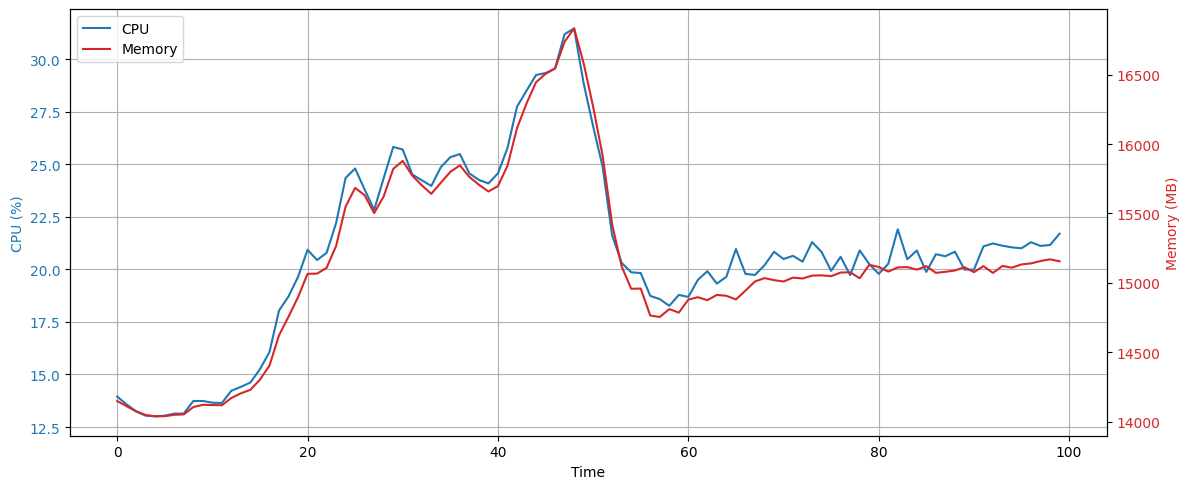

In [24]:
render(100)